# nba_dataset
[kaggle link](https://www.kaggle.com/datasets/wyattowalsh/basketball?resource=download)
"Daily Updated SQLite Database — 64,000+ Games, 4800+ Players, and 30 Teams 🏀"

This dataset provides a collection of sqlite and .csv files. For this work we will use only the **.csv**. The sqlite is updated in real time, but as discussed in the proposal we will focus season-wise so we will only need files from last season and earlier.

Description and usage of the files:
 - common_player_info - detailed info about all the players (team, height, name...)
 - ~~draft_combine_history - info of drafted players~~ <font color="red">**UNUSED**</font>
 - ~~draft_history - player drafted~~ <font color="red">**UNUSED**</font>
 - game - details and stats about everygame in the NBA 
 - ~~game_info - other info about games~~ <font color="red">**UNUSED**</font>
 - ~~game_summary - information about periods and broadcast~~ <font color="red">**UNUSED**</font>
 - ~~inactive_players - players retired~~ <font color="red">**UNUSED**</font>
 - line_score - points per game and others
 - ~~officials~~<font color="red">**UNUSED**</font>
 - other_stats - stats  per game of rebounds, turnovers...
 - play_by_play - description of a play in each game
 - player - simple description of players
 - team - simple list of league teams
 - ~~team_details - Details about the team's history and organization~~ <font color="red">**UNUSED**</font>
 - ~~team_history - year of foundation of all teams that were in the nba once~~ <font color="red">**UNUSED**</font>
 - team_info_common - stats of the team per year



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os.path



In [2]:
def missing(df):
    missing_value_df = df.isnull().sum()
    print(missing_value_df)

    raw_percent_missing_value = 100*(missing_value_df / len(df.index))
    percent_missing_value = round(raw_percent_missing_value,2)
    print(percent_missing_value.sort_values(ascending=False))

    percent_missing_value.plot(kind='barh')
    plt.figure(figsize=(10,6))
    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25)

## EDA

### Common player info

In [3]:
common_player_info = pd.read_csv('nba_dataset/csv/common_player_info.csv')
print(common_player_info.shape)
common_player_info.head(3)

(2457, 33)


,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09 00:00:00,Louisiana State,USA,...,mahmoud_abdul-rauf,1990.0,2000.0,N,Y,Y,1990,1,3,N
1,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
2,76007,John,Abramovic,John Abramovic,"Abramovic, John",J. Abramovic,john-abramovic,1919-02-09 00:00:00,Salem,USA,...,HISTADD_brooms_abramovic,1946.0,1947.0,N,Y,Y,Undrafted,Undrafted,Undrafted,N


Drop columns and inactive players at the time of the 1981 season; change the birthdate to datetime format

In [4]:
common_player_info.drop(common_player_info.columns[[4,5,6,8,10,13,16,17,21,23,26,27,28,32]], axis=1, inplace=True)

common_player_info = common_player_info[common_player_info['to_year']>1995]
common_player_info['birthdate'] = pd.to_datetime(common_player_info['birthdate'], dayfirst=True)
print(common_player_info.shape)
common_player_info.head(3)

(1308, 19)


,person_id,first_name,last_name,display_first_last,birthdate,country,height,weight,jersey,position,team_id,team_name,team_abbreviation,team_city,from_year,to_year,draft_year,draft_round,draft_number
0,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,1969-03-09,USA,6-1,162.0,1,Guard,1610612743,Nuggets,DEN,Denver,1990.0,2000.0,1990,1,3
1,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,1974-11-03,France,6-6,235.0,9,Forward-Guard,1610612758,Kings,SAC,Sacramento,1997.0,2003.0,1997,1,11
3,203112,Quincy,Acy,Quincy Acy,1990-10-06,USA,6-7,240.0,NaN,Forward,0,NaN,NaN,NaN,2012.0,2018.0,2012,2,37


Check for nan

person_id               0
first_name              0
last_name               0
display_first_last      0
birthdate               0
country                 0
height                 37
weight                 37
jersey                410
position               18
team_id                 0
team_name             409
team_abbreviation     409
team_city             409
from_year               0
to_year                 0
draft_year              0
draft_round            36
draft_number           37
dtype: int64
jersey                31.35
team_city             31.27
team_abbreviation     31.27
team_name             31.27
draft_number           2.83
height                 2.83
weight                 2.83
draft_round            2.75
position               1.38
first_name             0.00
team_id                0.00
country                0.00
birthdate              0.00
display_first_last     0.00
from_year              0.00
to_year                0.00
draft_year             0.00
last_name        

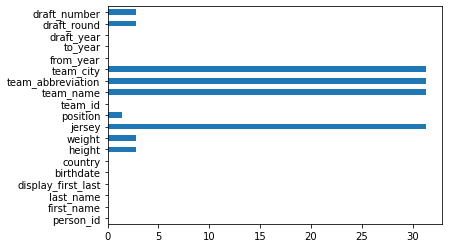

<Figure size 720x432 with 0 Axes>

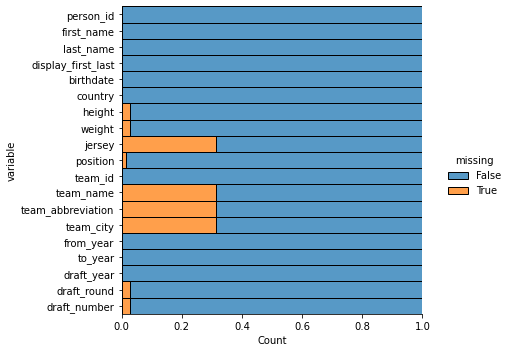

In [5]:
missing(common_player_info)

The missing values do not affect the general visualization of the data. The only part that will be problematic is the info about the players might be compromised, especially in older data. DONE

### Team

For this we will only drop the year_founded since it is irrelevant to the app. Notthin else will be changed as the data is complete. This table is usefull for the team id, as it matches in every other table of the dataset.

In [6]:
team = pd.read_csv("nba_dataset/csv/team.csv")
team.drop(['year_founded'], axis=1, inplace=True)
print(team.info())
team.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   full_name     30 non-null     object
 2   abbreviation  30 non-null     object
 3   nickname      30 non-null     object
 4   city          30 non-null     object
 5   state         30 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB
None


,id,full_name,abbreviation,nickname,city,state
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio


### ~~team_info_common~~

In [7]:
team_info_common = pd.read_csv("nba_dataset/csv/team_info_common.csv")
print(team_info_common.info())
team_info_common.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_id            27 non-null     int64  
 1   season_year        27 non-null     object 
 2   team_city          27 non-null     object 
 3   team_name          27 non-null     object 
 4   team_abbreviation  27 non-null     object 
 5   team_conference    27 non-null     object 
 6   team_division      27 non-null     object 
 7   team_code          27 non-null     object 
 8   team_slug          27 non-null     object 
 9   w                  27 non-null     int64  
 10  l                  27 non-null     int64  
 11  pct                27 non-null     float64
 12  conf_rank          27 non-null     int64  
 13  div_rank           27 non-null     int64  
 14  min_year           27 non-null     int64  
 15  max_year           27 non-null     int64  
 16  league_id          27 non-nu

,team_id,season_year,team_city,team_name,team_abbreviation,team_conference,team_division,team_code,team_slug,w,...,league_id,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,2022-23,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,32,...,0,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,2022-23,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,45,...,0,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,2022-23,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,40,...,0,22022,25,112.0,23,41.7,18,24.9,1,106.4


In [8]:
team_info_common.drop(team_info_common.columns[[4,7,8,14,15,16]], axis=1, inplace=True)
team_info_common.head(3)

,team_id,season_year,team_city,team_name,team_conference,team_division,w,l,pct,conf_rank,div_rank,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,2022-23,Atlanta,Hawks,East,Southeast,32,32,0.500,8,2,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,2022-23,Boston,Celtics,East,Atlantic,45,20,0.692,2,1,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,2022-23,Cleveland,Cavaliers,East,Central,40,26,0.606,4,2,22022,25,112.0,23,41.7,18,24.9,1,106.4


In [9]:
team_id1 = team['id']
team_id2 = team_info_common['team_id']

id = np.setdiff1d(team_id1, team_id2)

print('teams that are not in this table: {}'.format(team[team['id'].isin(id)]['full_name'].to_numpy()) )

teams that are not in this table: ['Toronto Raptors' 'Utah Jazz' 'Memphis Grizzlies']


Since this refers to the latest season and we want to focus on a full season, we will drop the stats and merge to the team dataframe. Also, there are 3 teams missing on this table. Themissing data will be added manually

In [10]:
team_info_common.drop(team_info_common.columns[6:], axis=1, inplace=True)
team_info_common.rename(columns={'team_name': 'nickname'}, inplace=True, errors='raise')
team = team.merge(team_info_common, on='nickname', how='left')

In [11]:
#team.drop(team.columns[[6,7,8]], inplace=True)
team.pop('team_id')
team.pop('season_year')
team.pop('team_city')
team.head()

,id,full_name,abbreviation,nickname,city,state,team_conference,team_division
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,East,Southeast
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,East,Atlantic
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,East,Central
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,West,Southwest
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,East,Central


In [12]:
ind = np.where(team["team_conference"].isna())[0]
team.loc[ind]

,id,full_name,abbreviation,nickname,city,state,team_conference,team_division
24,1610612761,Toronto Raptors,TOR,Raptors,Toronto,Ontario,NaN,NaN
25,1610612762,Utah Jazz,UTA,Jazz,Utah,Utah,NaN,NaN
26,1610612763,Memphis Grizzlies,MEM,Grizzlies,Memphis,Tennessee,NaN,NaN


In [13]:
team.loc[ind[0], 'team_conference'] = 'East'
team.loc[ind[0], 'team_division'] = 'Atlantic'

team.loc[ind[1], 'team_conference'] = 'West'
team.loc[ind[1], 'team_division'] = 'Northwest'

team.loc[ind[2], 'team_conference'] = 'West'
team.loc[ind[2], 'team_division'] = 'Southwest'

### Game

In [14]:
game = pd.read_csv("nba_dataset/csv/game.csv")
print(game.info())
game.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62339 entries, 0 to 62338
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               62339 non-null  int64  
 1   team_id_home            62339 non-null  int64  
 2   team_abbreviation_home  62339 non-null  object 
 3   team_name_home          62339 non-null  object 
 4   game_id                 62339 non-null  int64  
 5   game_date               62339 non-null  object 
 6   matchup_home            62339 non-null  object 
 7   wl_home                 62332 non-null  object 
 8   min                     62339 non-null  int64  
 9   fgm_home                62321 non-null  float64
 10  fga_home                44477 non-null  float64
 11  fg_pct_home             44438 non-null  float64
 12  fg3m_home               46686 non-null  float64
 13  fg3a_home               41422 non-null  float64
 14  fg3_pct_home            41063 non-null

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0


Drop columns and old games (change date to other format)

In [15]:
game.drop(game.columns[[2,3,28,30,31,53]], axis=1, inplace=True)


In [16]:
#game['game_date'].str.split('-')
#self.df["date"] = pd.to_datetime(self.df["date"]).dt.date

game['game_date'] = pd.to_datetime(game['game_date'], dayfirst=True)
mask = (game['game_date'] > '1996-07-01') & (game['game_date'] < '2022-07-01')

game = game.loc[mask]
game.shape

(29396, 48)

season_id          0
team_id_home       0
game_id            0
game_date          0
matchup_home       0
wl_home            1
min                0
fgm_home           0
fga_home           0
fg_pct_home        1
fg3m_home          0
fg3a_home          0
fg3_pct_home       2
ftm_home           0
fta_home           0
ft_pct_home        1
oreb_home          0
dreb_home          0
reb_home           0
ast_home           0
stl_home           0
blk_home           0
tov_home           0
pf_home            0
pts_home           0
plus_minus_home    0
team_id_away       0
matchup_away       0
wl_away            1
fgm_away           0
fga_away           0
fg_pct_away        1
fg3m_away          0
fg3a_away          0
fg3_pct_away       1
ftm_away           0
fta_away           0
ft_pct_away        1
oreb_away          0
dreb_away          0
reb_away           0
ast_away           0
stl_away           0
blk_away           0
tov_away           0
pf_away            0
pts_away           0
plus_minus_aw

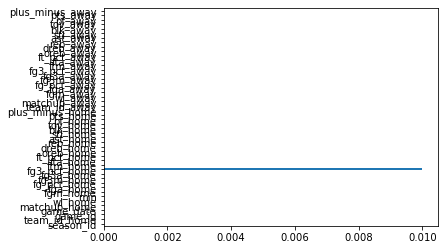

<Figure size 720x432 with 0 Axes>

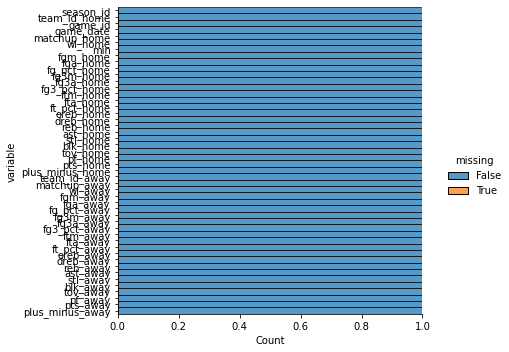

In [17]:
missing(game)

### ~~other_stats~~

This data adds to some of the games registed in the games .csv file. This data is 3 times smaller than that dataframe.

In [18]:
other_stats = pd.read_csv("nba_dataset/csv/other_stats.csv")
other_stats.info()
other_stats.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27781 entries, 0 to 27780
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   league_id               27781 non-null  int64  
 1   team_id_home            27781 non-null  int64  
 2   team_abbreviation_home  27781 non-null  object 
 3   team_city_home          27781 non-null  object 
 4   pts_paint_home          27781 non-null  int64  
 5   pts_2nd_chance_home     27781 non-null  int64  
 6   pts_fb_home             27781 non-null  int64  
 7   largest_lead_home       27781 non-null  int64  
 8   lead_changes            27781 non-null  int64  
 9   times_tied              27781 non-null  int64  
 10  team_turnovers_home     27781 non-null  int64  
 11  total_turnovers_home    27687 non-null  float64
 12  team_rebounds_home      25881 non-null  float64
 13  pts_off_to_home         25601 non-null  float64
 14  team_id_away            27781 non-null

,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,...,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,0,1610612745,HOU,Houston,44,16,20,25,8,3,...,SAC,Sacramento,38,9,12,2,0,27.0,11.0,NaN
1,0,1610612748,MIA,Miami,32,15,14,16,0,0,...,ATL,Atlanta,32,9,6,0,1,24.0,7.0,NaN
2,0,1610612753,ORL,Orlando,38,25,3,18,4,6,...,WAS,Washington,48,9,20,5,0,16.0,13.0,NaN


In [19]:
other_stats.drop(other_stats.columns[[0,2,3,15,16]], axis=1, inplace=True)
other_stats.head(3)

,team_id_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,1610612745,44,16,20,25,8,3,2,23.0,14.0,NaN,1610612758,38,9,12,2,0,27.0,11.0,NaN
1,1610612748,32,15,14,16,0,0,1,19.0,6.0,NaN,1610612737,32,9,6,0,1,24.0,7.0,NaN
2,1610612753,38,25,3,18,4,6,1,17.0,8.0,NaN,1610612764,48,9,20,5,0,16.0,13.0,NaN


team_id_home               0
pts_paint_home             0
pts_2nd_chance_home        0
pts_fb_home                0
largest_lead_home          0
lead_changes               0
times_tied                 0
team_turnovers_home        0
total_turnovers_home      94
team_rebounds_home      1900
pts_off_to_home         2180
team_id_away               0
pts_paint_away             0
pts_2nd_chance_away        0
pts_fb_away                0
largest_lead_away          0
team_turnovers_away        0
total_turnovers_away      94
team_rebounds_away      1900
pts_off_to_away         2180
dtype: int64
pts_off_to_home         7.85
pts_off_to_away         7.85
team_rebounds_away      6.84
team_rebounds_home      6.84
total_turnovers_away    0.34
total_turnovers_home    0.34
pts_2nd_chance_home     0.00
pts_paint_away          0.00
team_turnovers_away     0.00
largest_lead_away       0.00
pts_fb_away             0.00
pts_2nd_chance_away     0.00
team_id_away            0.00
pts_fb_home             0.00
p

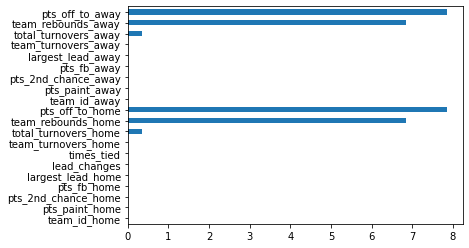

<Figure size 720x432 with 0 Axes>

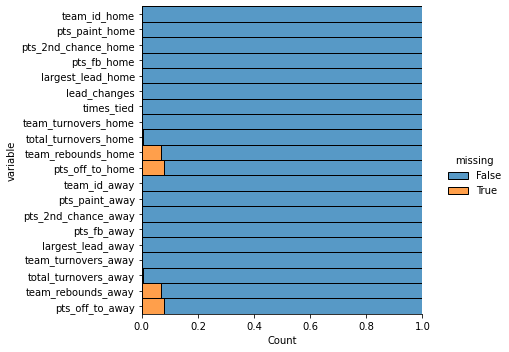

In [20]:
missing(other_stats)

### line_score

In [21]:
line_score = pd.read_csv("nba_dataset/csv/line_score.csv")
print(line_score.info())
line_score.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60768 entries, 0 to 60767
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_date_est           60768 non-null  object 
 1   game_sequence           31583 non-null  float64
 2   game_id                 60768 non-null  int64  
 3   team_id_home            60768 non-null  int64  
 4   team_abbreviation_home  60768 non-null  object 
 5   team_city_name_home     60768 non-null  object 
 6   team_nickname_home      60768 non-null  object 
 7   team_wins_losses_home   60768 non-null  object 
 8   pts_qtr1_home           59665 non-null  float64
 9   pts_qtr2_home           59654 non-null  float64
 10  pts_qtr3_home           59616 non-null  float64
 11  pts_qtr4_home           59615 non-null  float64
 12  pts_ot1_home            31340 non-null  float64
 13  pts_ot2_home            29997 non-null  float64
 14  pts_ot3_home            29799 non-null

,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,...,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,NaN,24600001,1610610035,HUS,Toronto,Huskies,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
1,1946-11-02 00:00:00,NaN,24600003,1610610034,BOM,St. Louis,Bombers,-,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
2,1946-11-02 00:00:00,NaN,24600002,1610612738,BOS,Boston,Celtics,-,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59


In [22]:
line_score['game_date_est'] = pd.to_datetime(line_score['game_date_est'], dayfirst=True)
mask = (line_score['game_date_est'] > '1996-07-01')
line_score = line_score.loc[mask]
line_score.shape

(29775, 43)

many lines seem to be missing values so we check that first

game_date_est                 0
game_sequence                 0
game_id                       0
team_id_home                  0
team_abbreviation_home        0
team_city_name_home           0
team_nickname_home            0
team_wins_losses_home         0
pts_qtr1_home                 0
pts_qtr2_home                 0
pts_qtr3_home                 0
pts_qtr4_home                 0
pts_ot1_home                 13
pts_ot2_home                 14
pts_ot3_home                 15
pts_ot4_home                 15
pts_ot5_home              18286
pts_ot6_home              18286
pts_ot7_home              18286
pts_ot8_home              18286
pts_ot9_home              18286
pts_ot10_home             18286
pts_home                      0
team_id_away                  0
team_abbreviation_away        0
team_city_name_away           0
team_nickname_away            0
team_wins_losses_away         0
pts_qtr1_away                 0
pts_qtr2_away                 0
pts_qtr3_away                 0
pts_qtr4

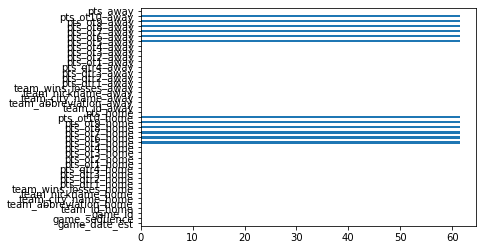

<Figure size 720x432 with 0 Axes>

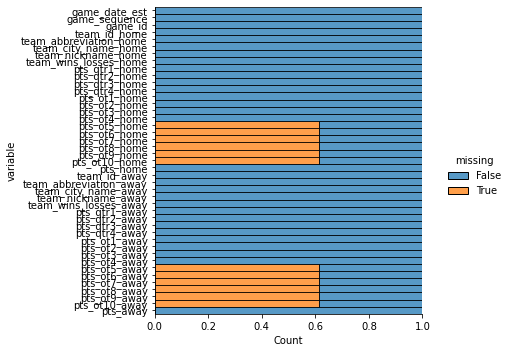

In [23]:
missing(line_score)

In [24]:
line_score['team_wins_losses_home'].unique()

array(['-', '1-1', '58-24', ..., '20-60', '63-17', '64-18'], dtype=object)

The ot columns are irrelevant for the visualization so they will be dropped ,so as the game_sequence

In [25]:
line_score.drop(line_score.columns[[1,4,5,7,6,12,13,14,15,16,17,18,19,20,21,
                                    24,25,26,27,32,33,34,35,36,37,38,39,40,41]], axis=1, inplace=True)
line_score.head(3)

,game_date_est,game_id,team_id_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_home,team_id_away,pts_qtr1_away,pts_qtr2_away,pts_qtr3_away,pts_qtr4_away,pts_away
30993,1996-11-01,29600009,1610612745,31.0,21.0,24.0,20.0,96,1610612758,24.0,11.0,19.0,31.0,85
30994,1996-11-01,29600005,1610612748,25.0,28.0,23.0,18.0,94,1610612737,15.0,24.0,27.0,15.0,81
30995,1996-11-01,29600004,1610612764,18.0,27.0,24.0,27.0,96,1610612753,26.0,26.0,19.0,21.0,92


The team_wins_losses and team_wins_losses_away must be revised

### player

Simple player list, so will not be changed at all

In [26]:
player = pd.read_csv("nba_dataset/csv/player.csv")
player.head(3)

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0


We will then merge this table to the player_info_common

In [27]:
common_player_info.columns
common_player_info.rename(columns={'person_id': 'id'}, inplace=True, errors='raise')

In [28]:

common_player_info.drop(common_player_info[['first_name', 'last_name', 'display_first_last']], inplace=True, axis=1)

In [29]:
player = player.merge(common_player_info, on='id', how='left')
player

,id,full_name,first_name,last_name,is_active,birthdate,country,height,weight,jersey,position,team_id,team_name,team_abbreviation,team_city,from_year,to_year,draft_year,draft_round,draft_number
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,0,1969-03-09,USA,6-1,162.0,1,Guard,1.610613e+09,Nuggets,DEN,Denver,1990.0,2000.0,1990,1,3
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,0,1974-11-03,France,6-6,235.0,9,Forward-Guard,1.610613e+09,Kings,SAC,Sacramento,1997.0,2003.0,1997,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,1627790,Ante Zizic,Ante,Zizic,0,1997-01-04,Croatia,6-10,266.0,41,Center,1.610613e+09,Cavaliers,CLE,Cleveland,2017.0,2019.0,2016,1,23
4827,78647,Jim Zoet,Jim,Zoet,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4828,78648,Bill Zopf,Bill,Zopf,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4829,1627826,Ivica Zubac,Ivica,Zubac,1,1997-03-18,Croatia,7-0,240.0,40,Center,1.610613e+09,Clippers,LAC,LA,2016.0,2022.0,2016,2,32


### play_by_play

Every intervention in a game made by players. Useful to draw player stats per season and game

In [30]:
try:
    play_by_play = pd.read_csv('plays.csv')
    plays = play_by_play.copy()
except:     
    play_by_play = pd.read_csv("nba_dataset/csv/play_by_play.csv")
    play_by_play.drop(play_by_play.columns[[1,5,6,16,17,18,23,24,25,30,31,32,33]], axis=1, inplace=True)
    plays = play_by_play.copy()
    plays = plays[plays['eventmsgtype'] != 7]
    plays = plays[plays['eventmsgtype'] != 8]
    plays = plays[plays['eventmsgtype'] != 9]
    plays = plays[plays['eventmsgtype'] != 10]
    plays = plays[plays['eventmsgtype'] != 11]
    plays = plays[plays['eventmsgtype'] != 12]
    plays = plays[plays['eventmsgtype'] != 13]
    plays['scoremargin'] = plays['scoremargin'].str.replace('TIE','0')
    plays['scoremargin'] = plays['scoremargin'].astype(float)
    '''
    start = plays.loc[plays['eventmsgtype'] == 12]
    ind = (start['period'] == 1).index.dropna()
    #ind = df.index[df['BoolCol'] == True].tolist()
    #plays.loc[ind.astype(int),'scoremargin'] = 0
    ind = start.index[(start['period'] == 1) == True].tolist()
    plays.loc[ind,'scoremargin'] = 0
    '''
    if not os.path.exists('plays.csv'):
        plays.to_csv('plays.csv')
    plays.shape

In [31]:
play_by_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11316097 entries, 0 to 11316096
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   game_id             int64  
 2   eventmsgtype        int64  
 3   eventmsgactiontype  int64  
 4   period              int64  
 5   homedescription     object 
 6   neutraldescription  object 
 7   visitordescription  object 
 8   score               object 
 9   scoremargin         float64
 10  person1type         float64
 11  player1_id          int64  
 12  player1_name        object 
 13  player1_team_id     float64
 14  person2type         float64
 15  player2_id          int64  
 16  player2_name        object 
 17  player2_team_id     float64
 18  person3type         float64
 19  player3_id          int64  
 20  player3_name        object 
 21  player3_team_id     float64
dtypes: float64(7), int64(8), object(7)
memory usage: 1.9+ GB


Check an event

In [32]:
plays.loc[plays['eventmsgtype'] == 1]

,Unnamed: 0,game_id,eventmsgtype,eventmsgactiontype,period,homedescription,neutraldescription,visitordescription,score,scoremargin,...,player1_name,player1_team_id,person2type,player2_id,player2_name,player2_team_id,person3type,player3_id,player3_name,player3_team_id
5,7,29600009,1,2,1,Elie 10' Running Jump Shot (2 PTS) (Olajuwon 1...,NaN,NaN,0 - 2,2.0,...,Mario Elie,1.610613e+09,4.0,165,Hakeem Olajuwon,1.610613e+09,0.0,0,NaN,NaN
6,8,29600009,1,1,1,NaN,NaN,Abdul-Rauf 9' Jump Shot (2 PTS),2 - 2,0.0,...,Mahmoud Abdul-Rauf,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN
7,9,29600009,1,6,1,Maloney Driving Layup (2 PTS) (Drexler 1 AST),NaN,NaN,2 - 4,2.0,...,Matt Maloney,1.610613e+09,4.0,17,Clyde Drexler,1.610613e+09,0.0,0,NaN,NaN
10,12,29600009,1,5,1,NaN,NaN,Williamson Layup (2 PTS) (Polynice 1 AST),4 - 4,0.0,...,Corliss Williamson,1.610613e+09,5.0,178,Olden Polynice,1.610613e+09,0.0,0,NaN,NaN
13,15,29600009,1,1,1,NaN,NaN,Williamson 7' Jump Shot (4 PTS) (Richmond 1 AST),6 - 4,-2.0,...,Corliss Williamson,1.610613e+09,5.0,782,Mitch Richmond,1.610613e+09,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11316057,13213822,22200991,1,72,4,NaN,NaN,Poeltl 3' Putback Layup (8 PTS),91 - 103,12.0,...,Jakob Poeltl,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN
11316065,13213830,22200991,1,72,4,NaN,NaN,Barnes Putback Layup (16 PTS),93 - 103,10.0,...,Scottie Barnes,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN
11316070,13213836,22200991,1,72,4,NaN,NaN,Barnes 3' Putback Layup (18 PTS),95 - 103,8.0,...,Scottie Barnes,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN
11316079,13213845,22200991,1,1,4,NaN,NaN,Anunoby 28' 3PT Jump Shot (18 PTS) (Barnes 4 AST),98 - 104,6.0,...,O.G. Anunoby,1.610613e+09,5.0,1630567,Scottie Barnes,1.610613e+09,0.0,0,NaN,NaN


Score

Shots

In [33]:
shots = plays.loc[plays['eventmsgtype'] == 1]

In [34]:
scored_home = []
scored_away = []
#scored_home = np.array([2])
#scored_away = np.array([0])

game_id = shots['game_id'].to_numpy()
score_margin = shots['scoremargin'].to_numpy()
gid = game_id[0]
margin = 0

for i in range(score_margin.shape[0]):
    if gid != game_id[i]:
        gid = game_id[i]
        margin = 0
    
    if margin - score_margin[i] > 0:
        scored_home.append(margin - score_margin[i])
        scored_away.append(0)
        margin = score_margin[i]
    else:
        scored_away.append(score_margin[i] - margin)
        scored_home.append(0)
        margin = score_margin[i]
    
    

In [35]:
scored_home = np.array(scored_home)
scored_away = np.array(scored_away)

scored_home[scored_home>3] = 2
scored_away[scored_away>3] = 2

scored_home[scored_home==1] = 2
scored_away[scored_away==1] = 2

fg2_home = (scored_home == 2).astype(int)
fg3_home = (scored_home == 3).astype(int)

fg2_away = (scored_away == 2).astype(int)
fg3_away = (scored_away == 3).astype(int)


In [36]:
assists = shots['player2_name'].notna()
assists = assists.astype(int)

assists_home = np.divide(np.multiply(assists, scored_home), scored_home)
assists_away = np.divide(np.multiply(assists, scored_away), scored_away)

In [37]:

shots.insert(8, 'fg2_pts_home', fg2_home)
shots.insert(9, 'fg3_pts_home', fg3_home)
shots.insert(10, 'fg2_pts_away', fg2_away) 
shots.insert(11, 'fg3_pts_away', fg3_away)
shots.insert(12, 'ast_home', assists_home)
shots.insert(13, 'ast_away', assists_away)
shots.insert(14, 'pts_home', scored_home)
shots.insert(15, 'pts_away', scored_away)


In [38]:
#np.concatenate((col1, col2), axis=0)
#scored = pd.concat(shots[['game_id', 'player1_id', 'scored_home', 'scored_away']], shots[[ 'player2_id', 'assisted_home', 'assisted_away']])

sc = pd.concat((shots[['game_id', 'player1_id', 'fg2_pts_home', 'fg3_pts_home', 'fg2_pts_away', 'fg3_pts_away', 'pts_home', 'pts_away']], 
                shots[['game_id', 'player2_id', 'ast_home', 'ast_away']].rename(columns={'player2_id':'player1_id'})), axis=0)
sc = sc[sc['player1_id']!=0]
sc = sc.fillna(0)
sc

,game_id,player1_id,fg2_pts_home,fg3_pts_home,fg2_pts_away,fg3_pts_away,pts_home,pts_away,ast_home,ast_away
5,29600009,53,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
6,29600009,51,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
7,29600009,1074,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
10,29600009,722,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
13,29600009,722,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11316018,22200991,1627832,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11316029,22200991,202331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11316039,22200991,1627832,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11316079,22200991,1630567,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


shot_types = []

for i in range(110):
    temp = shots.loc[shots['eventmsgactiontype'] == i]
    try:
        shot_types.append(i)
    except:
        continue


Types of events:
1. attempt scored
2. miss
3. free throw
4. rebound
5. turnover

Types of shots:
1. Jump Shot
2. Dunk
3. Layup
4. Others

jump_shot = [1,2,45,46,47,63,65,66,77,78,79,80,94,101,102,103,104,105]
dunk_shot = [7,8,9,48,49,50,51,52,64,87,88,89,90,91,92,106,107,108,109]
layup_shot = [5,6,40,41,42,43,44,71,72,73,74,75,76,97,98,99,100]
other_shot = []

for i in shot_types:
    if (i not in jump_shot) & (i not in dunk_shot) & (i not in layup_shot):
        other_shot.append(i)

# shots.loc[shots['eventmsgactiontype'].isin(dunk_shot)]
jump = shots['eventmsgactiontype'].isin(jump_shot).astype(int)
dunk = shots['eventmsgactiontype'].isin(dunk_shot).astype(int)
layup = shots['eventmsgactiontype'].isin(layup_shot).astype(int)
other = shots['eventmsgactiontype'].isin(other_shot).astype(int)



The eventmsgactiontype lists a description of the taken in each event type. As this goes to the 110 values, it is very difficult to draw a data table with that level of description. With that said, we take out only the point maker (player 1) and the assister (player 2). We then find if the shot gives 1, 2 or 3 points in the scoreboard.

Misses/Blocks

In [39]:
misses = plays[plays['eventmsgtype'] == 2]

In [40]:

blocks_home = misses['homedescription'].str.contains('BLOCK')
blocks_away = misses['visitordescription'].str.contains('BLOCK')
miss = []

blocks_home = blocks_home.fillna(0)
blocks_home = blocks_home.astype(int)

blocks_away = blocks_away.fillna(0)
blocks_away = blocks_away.astype(int)
miss = (blocks_home == blocks_away).astype(int)
misses[blocks_home==1]


,Unnamed: 0,game_id,eventmsgtype,eventmsgactiontype,period,homedescription,neutraldescription,visitordescription,score,scoremargin,...,player1_name,player1_team_id,person2type,player2_id,player2_name,player2_team_id,person3type,player3_id,player3_name,player3_team_id
137,159,29600009,2,5,2,Olajuwon BLOCK (1 BLK),NaN,MISS Grant Layup,NaN,NaN,...,Brian Grant,1.610613e+09,0.0,0,NaN,NaN,4.0,165,Hakeem Olajuwon,1.610613e+09
527,598,29600005,2,1,2,Mourning BLOCK (1 BLK),NaN,MISS Smith 6' Jump Shot,NaN,NaN,...,Steven Smith,1.610613e+09,0.0,0,NaN,NaN,4.0,297,Alonzo Mourning,1.610613e+09
690,785,29600005,2,1,3,Thomas BLOCK (1 BLK),NaN,MISS Blaylock 15' Jump Shot,NaN,NaN,...,Mookie Blaylock,1.610613e+09,0.0,0,NaN,NaN,4.0,703,Kurt Thomas,1.610613e+09
744,852,29600005,2,5,4,Mourning BLOCK (2 BLK),NaN,MISS Mutombo Layup,NaN,NaN,...,Dikembe Mutombo,1.610613e+09,0.0,0,NaN,NaN,4.0,297,Alonzo Mourning,1.610613e+09
774,884,29600005,2,5,4,Mourning BLOCK (3 BLK),NaN,MISS Blaylock Layup,NaN,NaN,...,Mookie Blaylock,1.610613e+09,0.0,0,NaN,NaN,4.0,297,Alonzo Mourning,1.610613e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315594,13213293,22200990,2,5,3,Wainright BLOCK (1 BLK),NaN,MISS Waters III 5' Layup,NaN,NaN,...,Lindy Waters III,1.610613e+09,0.0,0,NaN,NaN,4.0,1630688,Ish Wainright,1.610613e+09
11315730,13213447,22200991,2,97,1,Zubac BLOCK (1 BLK),NaN,MISS Siakam Tip Layup Shot,NaN,NaN,...,Pascal Siakam,1.610613e+09,0.0,0,NaN,NaN,4.0,1627826,Ivica Zubac,1.610613e+09
11315822,13213551,22200991,2,41,2,Westbrook BLOCK (1 BLK),NaN,MISS Trent Jr. 3' Running Layup,NaN,NaN,...,Gary Trent Jr.,1.610613e+09,0.0,0,NaN,NaN,4.0,201566,Russell Westbrook,1.610613e+09
11315873,13213612,22200991,2,5,2,Zubac BLOCK (2 BLK),NaN,MISS Anunoby 4' Layup,NaN,NaN,...,O.G. Anunoby,1.610613e+09,0.0,0,NaN,NaN,4.0,1627826,Ivica Zubac,1.610613e+09


In [41]:
misses.insert(8, 'blk_home', blocks_home) 
misses.insert(9, 'blk_away', blocks_away) 
misses.insert(10, 'miss', miss) 

In [42]:
mb = pd.concat((misses[['game_id', 'player1_id', 'miss']], 
                misses[['game_id', 'player3_id', 'blk_home', 'blk_away']].rename(columns={'player3_id':'player1_id'})), axis=0)
mb = mb[mb['player1_id']!=0]
mb = mb.fillna(0)
mb

,game_id,player1_id,miss,blk_home,blk_away
1,29600009,165,1.0,0.0,0.0
3,29600009,17,1.0,0.0,0.0
8,29600009,722,1.0,0.0,0.0
11,29600009,53,1.0,0.0,0.0
14,29600009,53,1.0,0.0,0.0
...,...,...,...,...,...
11315822,22200991,201566,0.0,1.0,0.0
11315844,22200991,1627751,0.0,0.0,1.0
11315873,22200991,1627826,0.0,1.0,0.0
11316060,22200991,201569,0.0,1.0,0.0


Free throws

In [43]:
free_throw = plays[plays['eventmsgtype'] == 3]

free_throw_misses = free_throw['score'].isna()
free_throw_home = free_throw['visitordescription'].isnull()
free_throw_away = free_throw['homedescription'].isnull()

free_throw_misses = free_throw_misses.astype(int)

free_throw_home = free_throw_home.fillna(0)
free_throw_home = free_throw_home.astype(int) - free_throw_misses
free_throw_home[free_throw_home == -1] = 0

free_throw_away = free_throw_away.fillna(0)
free_throw_away = free_throw_away.astype(int) - free_throw_misses
free_throw_away[free_throw_away == -1] = 0

In [44]:
free_throw.insert(8, 'ft_misses', free_throw_misses) 
free_throw.insert(9, 'ft_home', free_throw_home) 
free_throw.insert(10, 'ft_away', free_throw_away)
free_throw.insert(11, 'pts_home', free_throw_home)
free_throw.insert(12, 'pts_away', free_throw_away)



In [45]:

free_throw = free_throw[['game_id', 'player1_id', 'ft_misses', 'ft_home', 'ft_away']]
free_throw

,game_id,player1_id,ft_misses,ft_home,ft_away
39,29600009,788,0,1,0
40,29600009,788,0,1,0
43,29600009,782,0,0,1
74,29600009,53,0,1,0
75,29600009,53,0,1,0
...,...,...,...,...,...
11316076,22200991,202695,0,1,0
11316083,22200991,1630567,0,0,1
11316084,22200991,1630567,0,0,1
11316093,22200991,202695,0,1,0


Rebounds

In [46]:
reb = plays[plays['eventmsgtype'] == 4]

reb_home = reb['visitordescription'].isnull()
reb_away = reb['homedescription'].isnull()

reb_home = reb_home.astype(int)
reb_away = reb_away.astype(int)

In [47]:
reb.insert(8, 'reb_home', reb_home) 
reb.insert(9, 'reb_away', reb_away) 


In [48]:

reb = reb[['game_id', 'player1_id', 'reb_home', 'reb_away']]
reb

,game_id,player1_id,reb_home,reb_away
2,29600009,17,1,0
4,29600009,165,1,0
9,29600009,178,0,1
12,29600009,722,0,1
15,29600009,178,0,1
...,...,...,...,...
11316081,22200991,1627751,0,1
11316087,22200991,1610612761,0,1
11316089,22200991,1627783,0,1
11316091,22200991,202695,1,0


Turnover

In [49]:
turn = plays[plays['eventmsgtype'] == 5]
turn

,Unnamed: 0,game_id,eventmsgtype,eventmsgactiontype,period,homedescription,neutraldescription,visitordescription,score,scoremargin,...,player1_name,player1_team_id,person2type,player2_id,player2_name,player2_team_id,person3type,player3_id,player3_name,player3_team_id
0,2,29600009,5,4,1,NaN,NaN,Williamson Traveling Turnover (P1.T1),NaN,NaN,...,Corliss Williamson,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN
31,34,29600009,5,4,1,NaN,NaN,Polynice Traveling Turnover (P1.T2),NaN,NaN,...,Olden Polynice,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN
32,35,29600009,5,1,1,Drexler Bad Pass Turnover (P1.T1),NaN,NaN,NaN,NaN,...,Clyde Drexler,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN
72,81,29600009,5,2,1,Olajuwon STEAL (1 STL),NaN,Smith Lost Ball Turnover (P1.T3),NaN,NaN,...,Michael Smith,1.610613e+09,4.0,165,Hakeem Olajuwon,1.610613e+09,0.0,0,NaN,NaN
82,94,29600009,5,11,1,ROCKETS Turnover: Shot Clock (T#2),NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0,NaN,NaN,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315977,13213731,22200991,5,4,3,Leonard Traveling Turnover (P3.T15),NaN,NaN,NaN,NaN,...,Kawhi Leonard,1.610613e+09,0.0,0,NaN,NaN,1.0,0,NaN,NaN
11316025,13213789,22200991,5,37,4,Leonard Offensive Foul Turnover (P4.T16),NaN,NaN,NaN,NaN,...,Kawhi Leonard,1.610613e+09,0.0,0,NaN,NaN,1.0,0,NaN,NaN
11316028,13213792,22200991,5,2,4,Leonard STEAL (3 STL),NaN,Poeltl Lost Ball Turnover (P3.T11),NaN,NaN,...,Jakob Poeltl,1.610613e+09,4.0,202695,Kawhi Leonard,1.610613e+09,0.0,0,NaN,NaN
11316048,13213813,22200991,5,4,4,NaN,NaN,Siakam Traveling Turnover (P3.T12),NaN,NaN,...,Pascal Siakam,1.610613e+09,0.0,0,NaN,NaN,1.0,0,NaN,NaN


In [50]:

steal_home = turn['homedescription'].str.contains('STEAL')
steal_away = turn['visitordescription'].str.contains('STEAL')
turnover_home = turn['homedescription'].str.contains('Turnover')
turnover_away = turn['visitordescription'].str.contains('Turnover')

steal_home = steal_home.fillna(0)
steal_home = steal_home.astype(int)

steal_away = steal_away.fillna(0)
steal_away = steal_away.astype(int)

turnover_home = turnover_home.fillna(0)
turnover_home = turnover_home.astype(int) - steal_home
turnover_home[turnover_home == -1] = 0

turnover_away = turnover_away.fillna(0)
turnover_away = turnover_away.astype(int) - steal_away
turnover_away[turnover_away == -1] = 0

In [51]:
turn.insert(8, 'stl_home', steal_home) 
turn.insert(9, 'stl_away', steal_away) 
turn.insert(10, 'tov_home', turnover_home) 
turn.insert(11, 'tov_away', turnover_away) 

In [52]:
ts = pd.concat((turn[['game_id', 'player1_id', 'tov_home', 'tov_away']], 
                turn[['game_id', 'player2_id', 'stl_home', 'stl_away']].rename(columns={'player2_id':'player1_id'})), axis=0)
ts = ts[ts['player1_id']!=0]
ts = ts.fillna(0)
ts

,game_id,player1_id,tov_home,tov_away,stl_home,stl_away
0,29600009,722,0.0,1.0,0.0,0.0
31,29600009,178,0.0,1.0,0.0,0.0
32,29600009,17,1.0,0.0,0.0,0.0
72,29600009,63,0.0,1.0,0.0,0.0
82,29600009,1610612745,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11315954,22200991,201569,0.0,0.0,1.0,0.0
11315965,22200991,202695,0.0,0.0,1.0,0.0
11315975,22200991,1628449,0.0,0.0,0.0,1.0
11316028,22200991,202695,0.0,0.0,1.0,0.0


### Fouls

In [53]:
fouls = plays[plays['eventmsgtype'] == 6]
fouls.head(3)

,Unnamed: 0,game_id,eventmsgtype,eventmsgactiontype,period,homedescription,neutraldescription,visitordescription,score,scoremargin,...,player1_name,player1_team_id,person2type,player2_id,player2_name,player2_team_id,person3type,player3_id,player3_name,player3_team_id
34,37,29600009,6,1,1,NaN,NaN,Grant P.FOUL (P1.T1),NaN,NaN,...,Brian Grant,1.610613e+09,5.0,0,NaN,1.610613e+09,0.0,0,NaN,NaN
38,41,29600009,6,2,1,NaN,NaN,Grant S.FOUL (P2.T2),NaN,NaN,...,Brian Grant,1.610613e+09,5.0,0,NaN,1.610613e+09,0.0,0,NaN,NaN
42,47,29600009,6,2,1,Olajuwon S.FOUL (P1.T1),NaN,NaN,NaN,NaN,...,Hakeem Olajuwon,1.610613e+09,0.0,0,NaN,NaN,0.0,0,NaN,NaN


In [54]:
foul_home = fouls['homedescription'].str.contains('P.FOUL')
foul_away = fouls['visitordescription'].str.contains('P.FOUL')

foul_home = foul_home.fillna(0)
foul_home = foul_home.astype(int)

foul_away = foul_away.fillna(0)
foul_away = foul_away.astype(int)

In [55]:
fouls.insert(8, 'pf_home', foul_home)
fouls.insert(8, 'pf_away', foul_away)

In [56]:
pf = pd.DataFrame(fouls[['game_id', 'player1_id', 'pf_home', 'pf_away']])
pf

,game_id,player1_id,pf_home,pf_away
34,29600009,258,0,1
38,29600009,258,0,0
42,29600009,165,0,0
56,29600009,722,0,1
66,29600009,53,1,0
...,...,...,...,...
11316044,22200991,1627751,0,0
11316051,22200991,202331,0,0
11316073,22200991,1627751,0,0
11316082,22200991,201569,0,0


___________________________
# Creating useful tables

## game_season

In [57]:
game.head(3)

,season_id,team_id_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,...,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away
31953,21996,1610612745,29600009,1996-11-01,HOU vs. SAC,W,240,34.0,87.0,0.391,...,8.0,32.0,40.0,18.0,11.0,8.0,27.0,24.0,85,-11
31954,21996,1610612748,29600005,1996-11-01,MIA vs. ATL,W,240,35.0,78.0,0.449,...,10.0,30.0,40.0,13.0,10.0,7.0,24.0,20.0,81,-13
31955,21996,1610612753,29600004,1996-11-01,ORL vs. WAS,L,240,35.0,91.0,0.385,...,11.0,26.0,37.0,25.0,10.0,10.0,16.0,24.0,96,4


In [58]:
game_season = game[['game_id', 'season_id']]
game_season['season_id'].unique()

array([21996, 21997, 21998, 21999, 22000, 22001, 22002, 22003, 22004,
       22005, 22006, 22007, 22008, 22009, 22010, 22011, 22012, 22013,
       22014, 22015, 22016, 22018, 22019, 22020, 22021], dtype=int64)

In [59]:
print(plays['game_id'].unique().sum())
print(game_season['game_id'].unique().sum())

647736572228
655160172813


## team_season_stats

In [60]:
new = game.copy()
new.drop(new.columns[[2, 3, 6, 4, 27]], axis=1, inplace=True)
new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29396 entries, 31953 to 61348
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season_id        29396 non-null  int64  
 1   team_id_home     29396 non-null  int64  
 2   wl_home          29395 non-null  object 
 3   fgm_home         29396 non-null  float64
 4   fga_home         29396 non-null  float64
 5   fg_pct_home      29395 non-null  float64
 6   fg3m_home        29396 non-null  float64
 7   fg3a_home        29396 non-null  float64
 8   fg3_pct_home     29394 non-null  float64
 9   ftm_home         29396 non-null  float64
 10  fta_home         29396 non-null  float64
 11  ft_pct_home      29395 non-null  float64
 12  oreb_home        29396 non-null  float64
 13  dreb_home        29396 non-null  float64
 14  reb_home         29396 non-null  float64
 15  ast_home         29396 non-null  float64
 16  stl_home         29396 non-null  float64
 17  blk_home

Glossary:
 - fg: Field Goals (any shot during open play)
    - m: made
    - a: attempted
 - reb: rebounds
 - ast: assists
 - stl: steals
 - blk: blocks
 - tov: turnovers
 - pf: personal fouls

In [61]:
col1 = new.iloc[:,:22]
col2 = new.iloc[:,22:]
col2.insert(0, 'season_id', col1['season_id'])

print(col1.shape, col2.shape)
season_games = np.concatenate((col1, col2), axis=0)

stats = ['season_id', 'team_id', 'wl', 'fgm', 'fga',
       'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm',
       'fta', 'ft_pct', 'oreb', 'dreb', 'reb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'plus_minus']

season_games = pd.DataFrame(data=season_games, columns=stats)
season_games = season_games.sort_values(['season_id', 'team_id'], ascending=(True, True), ignore_index=True)
season_games

(29396, 22) (29396, 22)


,season_id,team_id,wl,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
0,21996,1610612737,L,29.0,72.0,0.403,8.0,24.0,0.333,12.0,...,12.0,29.0,41.0,11.0,3.0,3.0,19.0,20.0,78,-12
1,21996,1610612737,W,32.0,76.0,0.421,7.0,22.0,0.318,16.0,...,12.0,22.0,34.0,22.0,5.0,5.0,14.0,22.0,87,4
2,21996,1610612737,W,22.0,60.0,0.367,4.0,15.0,0.267,37.0,...,16.0,35.0,51.0,10.0,10.0,8.0,17.0,18.0,85,8
3,21996,1610612737,W,41.0,85.0,0.482,8.0,19.0,0.421,11.0,...,12.0,40.0,52.0,26.0,6.0,8.0,16.0,13.0,101,21
4,21996,1610612737,W,42.0,82.0,0.512,12.0,22.0,0.545,14.0,...,13.0,31.0,44.0,20.0,14.0,7.0,18.0,20.0,110,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58787,22021,1610612766,W,42.0,98.0,0.429,17.0,32.0,0.531,18.0,...,17.0,36.0,53.0,26.0,6.0,2.0,12.0,22.0,119,9
58788,22021,1610612766,W,49.0,90.0,0.544,12.0,35.0,0.343,15.0,...,8.0,32.0,40.0,39.0,7.0,3.0,12.0,21.0,125,11
58789,22021,1610612766,L,42.0,87.0,0.483,11.0,30.0,0.367,19.0,...,7.0,25.0,32.0,34.0,14.0,1.0,17.0,18.0,114,-30
58790,22021,1610612766,L,45.0,85.0,0.529,12.0,38.0,0.316,13.0,...,7.0,24.0,31.0,34.0,8.0,3.0,15.0,18.0,115,-29


In [62]:
season_nan = season_games[season_games.isnull().any(axis=1)]
season_nan

,season_id,team_id,wl,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
3797,21997,1610612755,W,34.0,80.0,0.425,0.0,0.0,NaN,19.0,...,16.0,28.0,44.0,22.0,12.0,7.0,14.0,17.0,87,7
37416,22012,1610612738,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
38769,22012,1610612754,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Generate the new table

In [63]:
team_season_stats = season_games.groupby(['season_id', 'team_id'], as_index=False).mean()
team_season_stats

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_20980\935253364.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  team_season_stats = season_games.groupby(['season_id', 'team_id'], as_index=False).mean()


,season_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
0,21996,1610612737,34.292683,76.914634,0.446354,8.036585,22.365854,0.356463,18.182927,23.841463,...,12.451220,28.658537,41.109756,18.987805,8.548780,5.207317,14.975610,19.402439,94.804878,5.439024
1,21996,1610612738,37.390244,84.963415,0.441756,5.695122,16.231707,0.343671,20.109756,26.817073,...,13.353659,26.682927,40.036585,21.853659,9.878049,3.841463,16.365854,23.353659,100.585366,-7.329268
2,21996,1610612739,32.925926,72.790123,0.452790,5.827160,15.604938,0.367062,15.629630,21.592593,...,11.098765,26.382716,37.481481,20.839506,7.975309,3.802469,14.493827,22.987654,87.308642,1.679012
3,21996,1610612741,39.963415,84.426829,0.473817,6.378049,17.109756,0.372061,16.841463,22.536585,...,15.060976,30.012195,45.073171,26.121951,8.731707,4.048780,13.524390,19.719512,103.146341,10.804878
4,21996,1610612742,34.304878,78.682927,0.436451,5.243902,16.048780,0.317720,16.768293,23.390244,...,12.682927,27.585366,40.268293,20.280488,7.975610,4.280488,16.134146,21.926829,90.621951,-6.353659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,22021,1610612762,40.573171,86.182927,0.471561,14.536585,40.341463,0.359866,17.926829,23.365854,...,10.780488,35.560976,46.341463,22.390244,7.170732,4.902439,14.000000,18.865854,113.609756,6.036585
738,22021,1610612763,43.548780,94.378049,0.462183,11.524390,32.670732,0.352671,16.987805,23.146341,...,14.134146,35.036585,49.170732,25.987805,9.756098,6.500000,13.195122,19.756098,115.609756,5.682927
739,22021,1610612764,40.573171,86.048780,0.472195,10.487805,30.634146,0.342939,16.987805,21.682927,...,8.987805,34.121951,43.109756,25.024390,6.365854,4.951220,13.134146,18.841463,108.621951,-3.378049
740,22021,1610612765,38.158537,88.621951,0.431390,11.280488,34.609756,0.327183,17.231707,22.024390,...,10.975610,32.012195,42.987805,23.463415,7.682927,4.792683,14.182927,21.939024,104.829268,-7.719512


In [64]:
team_season_stats.round(2).head()

,season_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
0,21996,1610612737,34.29,76.91,0.45,8.04,22.37,0.36,18.18,23.84,...,12.45,28.66,41.11,18.99,8.55,5.21,14.98,19.40,94.80,5.44
1,21996,1610612738,37.39,84.96,0.44,5.70,16.23,0.34,20.11,26.82,...,13.35,26.68,40.04,21.85,9.88,3.84,16.37,23.35,100.59,-7.33
2,21996,1610612739,32.93,72.79,0.45,5.83,15.60,0.37,15.63,21.59,...,11.10,26.38,37.48,20.84,7.98,3.80,14.49,22.99,87.31,1.68
3,21996,1610612741,39.96,84.43,0.47,6.38,17.11,0.37,16.84,22.54,...,15.06,30.01,45.07,26.12,8.73,4.05,13.52,19.72,103.15,10.80
4,21996,1610612742,34.30,78.68,0.44,5.24,16.05,0.32,16.77,23.39,...,12.68,27.59,40.27,20.28,7.98,4.28,16.13,21.93,90.62,-6.35


## player_season_stats

In [65]:
player_game_stats = pd.concat((sc, mb, free_throw, reb, ts, pf), axis=0)
player_game_stats = player_game_stats.rename(columns={'player1_id': 'player_id'})
player_game_stats = player_game_stats.fillna(0)
player_game_stats

,game_id,player_id,fg2_pts_home,fg3_pts_home,fg2_pts_away,fg3_pts_away,pts_home,pts_away,ast_home,ast_away,...,ft_home,ft_away,reb_home,reb_away,tov_home,tov_away,stl_home,stl_away,pf_home,pf_away
5,29600009,53,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,29600009,51,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,29600009,1074,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,29600009,722,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,29600009,722,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11316044,22200991,1627751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11316051,22200991,202331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11316073,22200991,1627751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11316082,22200991,201569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
player_game_stats = player_game_stats.groupby(['game_id', 'player_id'], as_index=False).sum()
player_game_stats

,game_id,player_id,fg2_pts_home,fg3_pts_home,fg2_pts_away,fg3_pts_away,pts_home,pts_away,ast_home,ast_away,...,ft_home,ft_away,reb_home,reb_away,tov_home,tov_away,stl_home,stl_away,pf_home,pf_away
0,20000001,84,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,4.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0
1,20000001,137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0
2,20000001,164,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0
3,20000001,238,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,1.0
4,20000001,243,1.0,1.0,1.0,0.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652053,29901189,1869,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
652054,29901189,1885,7.0,1.0,0.0,0.0,17.0,0.0,7.0,0.0,...,0.0,14.0,0.0,14.0,0.0,5.0,0.0,1.0,0.0,2.0
652055,29901189,1953,0.0,0.0,4.0,0.0,0.0,8.0,0.0,7.0,...,3.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
652056,29901189,1610612746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
season_array = player_game_stats.merge(game_season, on='game_id', how='left')
season_array.insert(1, 'season_id', season_array.pop('season_id'))
season_array = season_array.dropna(subset=['season_id'])
season_array = season_array.astype({'season_id':'int'})
nmr_games = season_array.groupby(['season_id', 'player_id'], as_index=False).size()
nmr_games

,season_id,player_id,size
0,21996,0,2
1,21996,2,74
2,21996,3,60
3,21996,4,1
4,21996,6,1
...,...,...,...
13494,22021,1610612762,78
13495,22021,1610612763,79
13496,22021,1610612764,77
13497,22021,1610612765,80


In [68]:
player_season_stats = season_array.groupby(['season_id', 'player_id'], as_index=False).sum()
player_season_stats.insert(2, 'nmr_games', nmr_games['size'])
player_season_stats.drop(['game_id'], axis=1, inplace=True)
player_season_stats

,season_id,player_id,nmr_games,fg2_pts_home,fg3_pts_home,fg2_pts_away,fg3_pts_away,pts_home,pts_away,ast_home,...,ft_home,ft_away,reb_home,reb_away,tov_home,tov_away,stl_home,stl_away,pf_home,pf_away
0,21996,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21996,2,74,46.0,25.0,48.0,31.0,167.0,189.0,40.0,...,48.0,75.0,45.0,68.0,24.0,28.0,15.0,25.0,16.0,18.0
2,21996,3,60,51.0,7.0,49.0,10.0,123.0,128.0,16.0,...,26.0,34.0,99.0,112.0,28.0,15.0,21.0,21.0,17.0,19.0
3,21996,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21996,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,22021,1610612762,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,337.0,326.0,28.0,38.0,0.0,0.0,0.0,0.0
13495,22021,1610612763,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,339.0,368.0,28.0,26.0,0.0,0.0,0.0,0.0
13496,22021,1610612764,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,314.0,263.0,23.0,15.0,0.0,0.0,0.0,0.0
13497,22021,1610612765,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,331.0,303.0,34.0,30.0,0.0,0.0,0.0,0.0


On average, there are approximately 450 players on the NBA. Considering these 26 seasons 450 players * 26 = 11,700 which is more or less close to our entries.

## Season_id to years (index table)

In [69]:
season_ids = team_season_stats['season_id'].unique()
seasons = season_ids - 20000
seasons

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019, 2020, 2021], dtype=int64)

In [70]:

seasons2 = seasons + 1
array = []

for i in range(len(seasons)):
    array.append(str(seasons[i])[2:] + '/' + str(seasons2[i])[2:])


In [71]:
#season_ind = pd.DataFrame([seasons, array], columns=["season_id", "seasons_str"])
season_ind = pd.DataFrame({"season_id": season_ids, "season_str": array})

__________________
# Save the tables

In [73]:
team.to_csv('dash_app/data/team.csv', index = False, encoding='utf-8')
game.to_csv('dash_app/data/game.csv', index = False, encoding='utf-8')
line_score.to_csv('dash_app/data/line_score.csv', index = False, encoding='utf-8')
player.to_csv('dash_app/data/player.csv', index = False, encoding='utf-8')
game_season.to_csv('dash_app/data/game_season.csv', index = False, encoding='utf-8')
team_season_stats.to_csv('dash_app/data/team_season_stats.csv', index = False, encoding='utf-8')
player_season_stats.to_csv('dash_app/data/player_season_stats.csv', index = False, encoding='utf-8')
season_ind.to_csv('dash_app/data/season_ind.csv', index = False, encoding='utf-8')
